In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
with open('Description.txt',encoding="utf8") as f:
    print(f.read())

Data source: https://www.kaggle.com/datasets/uciml/adult-census-income?select=adult.csv
Data source: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset



The Dataset
The Census Income dataset has 48,842 entries. Each entry contains the following information
about an individual:
● age: the age of an individual
○ Integer greater than 0
● workclass: a general term to represent the employment status of an individual
○ Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov,
Without­pay, Never­worked.
● fnlwgt: final weight. In other words, this is the number of people the census believes
the entry represents..
○ Integer greater than 0
● education: the highest level of education achieved by an individual.
○ Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc,
9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.
● education­num: the highest level of education achieved in numerical form.
○ Integer greater than 0
● mar

### EDA

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#Lets drop 'fnlwgt' feature as it is not useful in our analysis or further predictions

In [8]:
df=df.drop('fnlwgt',axis=1)

In [9]:
#lets separate categorical dataframe and numerical dataframe to explore data clearly

In [10]:
df_cat=df.select_dtypes(include='object') #categorical dataframe (with target variable)

In [11]:
df_cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


In [12]:
df_num=df.select_dtypes(exclude='object')

In [13]:
df_num=pd.concat([df_num,df['income']],axis=1) #Numerical Dataframe (with target variable)

In [14]:
df_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,7,0,0,40,<=50K
1,38,9,0,0,50,<=50K
2,28,12,0,0,40,>50K
3,44,10,7688,0,40,>50K
4,18,10,0,0,30,<=50K


In [15]:
#Lets check feature deatails:

In [16]:
class feature_details:
    
    
    def categorical_feature_details(self,categorical_df):
        
        print("\n==================================================================")
        print("                   CATEGORICAL FEATURE DETAILS                     ")
        print("==================================================================")
        
        cols=categorical_df.columns
    
        for col in cols:
            print("\n\n________________")
            print("\nFeature: {}".format(col))
            print("________________")



            #nulls
            
            print('\n\nNULLS:-\n')
            nulls=df[col].isnull().sum()
            pernulls=np.round((nulls/(len(df[col])))*100,2)
            print("    {} % Null values \n    (i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))



            #uniques

            print('\nUNIQUES:-\n')
            nuniqs=df[col].nunique()
            print("    Total {} unique values".format(nuniqs))

            uniqs=df[col].unique()
            print("\n    Unique values are:")
            for i in range(len(uniqs)):
                print('    ',i+1,'-',uniqs[i])
                
            
            #value_counts
            
            val_cnt=df[col].value_counts()
            print("\n    Unique values counts:")
            print("        ")
            print(val_cnt)
                
                
                
                
    def categorywise_outliers_details(self,categorical_df,target_column):
        
        df=pd.concat([categorical_df,target_column],axis=1)
        targetcol=target_column.name
        cols=df.columns
        
        
        print("\n=====================================================================")
        print("\n                   CATEGORYWISE OUTLIERS DETAILS:                    ")
        print("               (with respect to target variable: {} )               \n".format(targetcol))

        print("=====================================================================")
        
        
        for i in range(len(cols)):

            col=cols[i]

            if col==targetcol:
                continue
            else:
                print("\n\n________________")
                print("\nCOLUMN: {} ".format(col.upper()))
                print("________________")
                cats=df[col].unique()
            
            for i in range(len(cats)):
                cat=cats[i]

                print("\n\n      {}. Category: {} \n".format(i+1,cat))



                q75,q25=np.percentile(df[df[col]==cat][targetcol],[75,25])
                iqr=np.round(q75-q25,3)
                upperlim=np.round(q75+(1.5*iqr),3)
                lowerlim=np.round(q25-(1.5*iqr),3)



                upper_indexes=df[(df[col]==cat) & (df[targetcol]>upperlim)].index
                lower_indexes=df[(df[col]==cat) & (df[targetcol]<lowerlim)].index

                mini=df[df[col]==cat][targetcol].min()
                maxi=df[df[col]==cat][targetcol].max()
                avg=np.round(df[df[col]==cat][targetcol].mean(),2)
                print("                Minimum {} for {} is: {}".format(targetcol,cat,mini))
                print("                Maximum {} for {} is: {}".format(targetcol,cat,maxi))
                print("                Average {} for {} is: {}\n".format(targetcol,cat,avg))
                
                print("                Upper Limit is {}".format(upperlim))
                print("                Lower Limit is {}".format(lowerlim))
                
                
                
                if (len(upper_indexes)>0) or (len(lower_indexes)>0):

                    if len(upper_indexes)>0:
                        print("\n                  >>> HIGHER OUTLIERS: {} ".format(len(upper_indexes)))
                        print("                \nOutliers are at index nos: \n",list(upper_indexes))
                        

                    if len(lower_indexes)>0:
                        print("                  >>> LOWER OUTLIERS: {} \n".format(len(lower_indexes)))
                        print("                \nOutliers are at index nos: \n",list(lower_indexes))
                        

                else:
                    print("                  NO OUTLIERS")
                    
                    
                
            
                

                
                
    def numerical_feature_details(self,numerical_df):
        print("\n==================================================================")
        print("                   NUMERICAL FEATURE DETAILS                     ")
        print("==================================================================")
        
        cols=numerical_df.columns

        for col in cols:
            print("\n\n________________")
            print("\nFeature: {}".format(col))
            print("________________\n")


            
            mins=df[col].min()
            maxs=df[col].max()
            avgs=np.round(df[col].mean(),2)
            
            print("Minimum {} is {}".format(col,mins))
            print("Maximum {} is {}".format(col,maxs))
            print("Average {} is {}".format(col,avgs))
            
            
            
            
            #nulls

            print('\n\nNULLS:-\n')
            nulls=df[col].isnull().sum()
            pernulls=np.round((nulls/(len(df[col])))*100,2)
            print("    {} % Null values \n    (i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))



            #uniques

            print('\nUNIQUES:-\n')
            nuniqs=df[col].nunique()
            print("    Total {} unique values".format(nuniqs))



            #outliers
            
            print('\nOUTLIERS:-\n')


            q75,q25=np.percentile(df[col],[75,25])
            iqr=np.round(q75-q25,3)
            upperlim=np.round(q75+(1.5*iqr),3)
            lowerlim=np.round(q25-(1.5*iqr),3)
            
            print("    25th Percentile is: ",q25)
            print("    75th Percentile is: ",q75)

            print("    Inter Quartile range is: ",iqr)

            print("    Upper limit is: ", upperlim)
            print("    Lower limit is: ", lowerlim)
                        
            print('\n')    
            print("    >>> HIGHER OUTLIERS: {} ".format(len(df[df[col]>upperlim])))
            print("    >>> LOWER OUTLIERS: {} ".format(len(df[df[col]<lowerlim])))
            print('\n\n')


            
            

       

In [17]:
feature_details=feature_details()

In [18]:
#Lets check categorical feature details:

In [19]:
feature_details.categorical_feature_details(df_cat)


                   CATEGORICAL FEATURE DETAILS                     


________________

Feature: workclass
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 48842 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 9 unique values

    Unique values are:
     1 - Private
     2 - Local-gov
     3 - ?
     4 - Self-emp-not-inc
     5 - Federal-gov
     6 - State-gov
     7 - Self-emp-inc
     8 - Without-pay
     9 - Never-worked

    Unique values counts:
        
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


________________

Feature: education
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 48842 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 16 unique values

    Unique values are:
     1 - 11th


##### 1. Feature - age

<Figure size 1010x606 with 0 Axes>

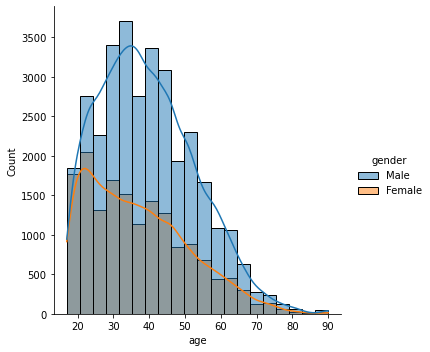

In [20]:
plt.figure(figsize=(10,6),dpi=101)
ax=sns.displot(data=df,x='age',bins=20,kde=True,hue='gender')

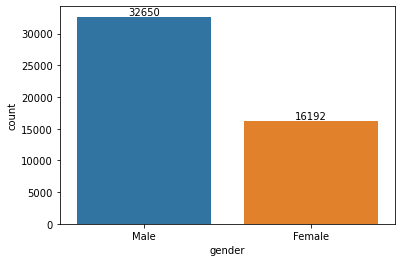

In [21]:
ax=sns.countplot(data=df,x='gender')
ax.bar_label(ax.containers[0]);

Observation: Although the Female count is lesser than Male count, The Distribution of age with respect to gender is similar for both Male and Female.

<Figure size 1010x606 with 0 Axes>

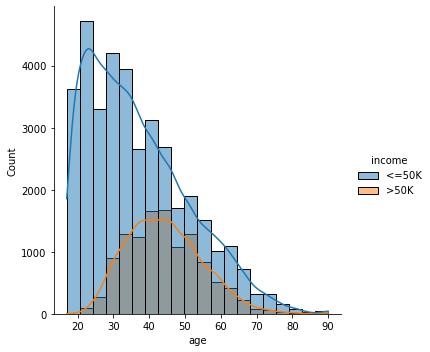

In [22]:
plt.figure(figsize=(10,6),dpi=101)
ax=sns.displot(data=df,x='age',bins=20,kde=True,hue='income')

In [23]:
df['age'].min()

17

Observation: 
1. people with income greater than 50k are more dense between 35 to 55 age group
2. people with income less than 50k are more at age group between 17 to 35 years

###### 2. Feature - workclass

In [24]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [25]:
#2799 missing values out of 48842 (i.e 5.7%) in workclass
#Lets fill missing value with mode (i.e 'Private' value)

In [26]:
df['workclass']=df['workclass'].replace('?',df['workclass'].mode()[0])

In [27]:
df['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

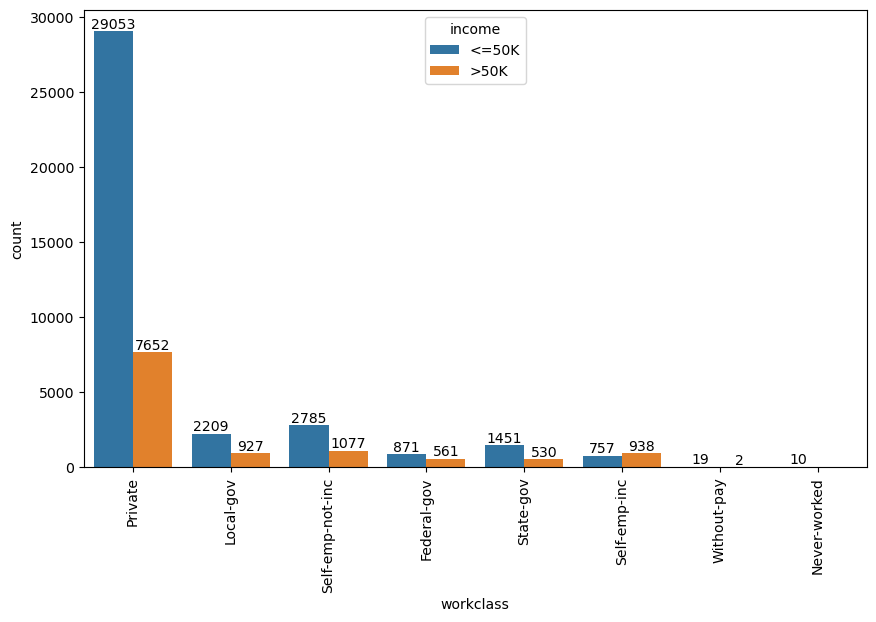

In [28]:
plt.figure(figsize=(10,6),dpi=101)
ax=sns.countplot(data=df,x='workclass',hue='income')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90);

###### 3. Feature - education

In [29]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

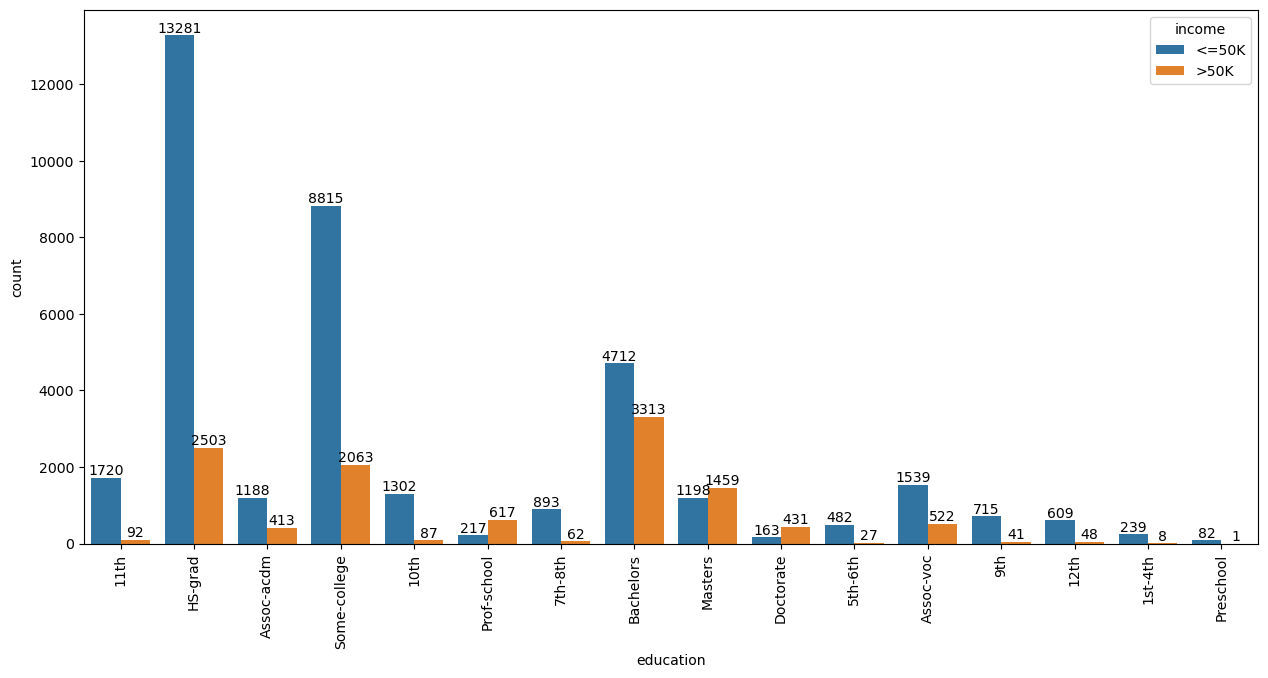

In [30]:
plt.figure(figsize=(15,7),dpi=101)
ax=sns.countplot(data=df,x='education',hue='income')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90);

Observation: 
1. people with income less than 50k is most likely to have completed their education uptill HS-grad or some-college
2. people with income higher than 50k is most likely to have completed their Bachelors

###### 4. Feature - Occupation

In [31]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [32]:
df[df['occupation']=='?']['income'].value_counts()

<=50K    2544
>50K      265
Name: income, dtype: int64

In [33]:
df[df['occupation']=='?']['education'].value_counts()

Some-college    842
HS-grad         812
Bachelors       253
11th            181
10th            150
7th-8th         111
Assoc-voc        83
Assoc-acdm       72
9th              69
Masters          67
12th             58
5th-6th          41
Prof-school      24
Doctorate        18
1st-4th          18
Preschool        10
Name: education, dtype: int64

In [34]:
df[df['occupation']=='?']['gender'].value_counts()

Male      1536
Female    1273
Name: gender, dtype: int64

In [35]:
df[df['occupation']=='?']['marital-status'].value_counts()

Never-married            1242
Married-civ-spouse        928
Divorced                  270
Widowed                   222
Separated                  97
Married-spouse-absent      45
Married-AF-spouse           5
Name: marital-status, dtype: int64

In [36]:
df[df['occupation']=='?']['native-country'].value_counts()

United-States                 2540
Mexico                          48
?                               46
Canada                          19
South                           14
Germany                         13
Philippines                     12
Taiwan                          10
China                            9
Puerto-Rico                      9
El-Salvador                      8
England                          8
Poland                           6
Dominican-Republic               6
Haiti                            6
Cuba                             5
Portugal                         5
Italy                            5
India                            4
Jamaica                          3
Iran                             3
Columbia                         3
Vietnam                          3
Japan                            3
Guatemala                        2
France                           2
Cambodia                         2
Hong                             2
Laos                

In [37]:
df[(df['income']=='<=50K') & (df['education']=='Some-college')&(df['gender']=='male')&
   (df['marital-status']=='Never-married')&(df['native-country']=='United-States')]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [38]:
df[(df['income']=='<=50K')&(df['marital-status']=='Never-married')&(df['native-country']=='United-States')&(df['education']=='Some-college')]['occupation'].value_counts()

Adm-clerical         770
Other-service        684
Sales                591
?                    532
Craft-repair         249
Exec-managerial      241
Handlers-cleaners    211
Prof-specialty       193
Tech-support         141
Machine-op-inspct    136
Transport-moving      99
Farming-fishing       80
Protective-serv       73
Priv-house-serv       12
Armed-Forces           3
Name: occupation, dtype: int64

In [39]:
df[(df['income']=='<=50K')&(df['marital-status']=='Never-married')&(df['native-country']=='United-States')&(df['education']=='Some-college')]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,Private,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
16,20,State-gov,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K
21,34,Private,Some-college,10,Never-married,Other-service,Own-child,Black,Female,0,0,35,United-States,<=50K
29,32,Self-emp-not-inc,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48764,27,Private,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<=50K
48769,32,Private,Some-college,10,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
48776,26,Private,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,<=50K
48808,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


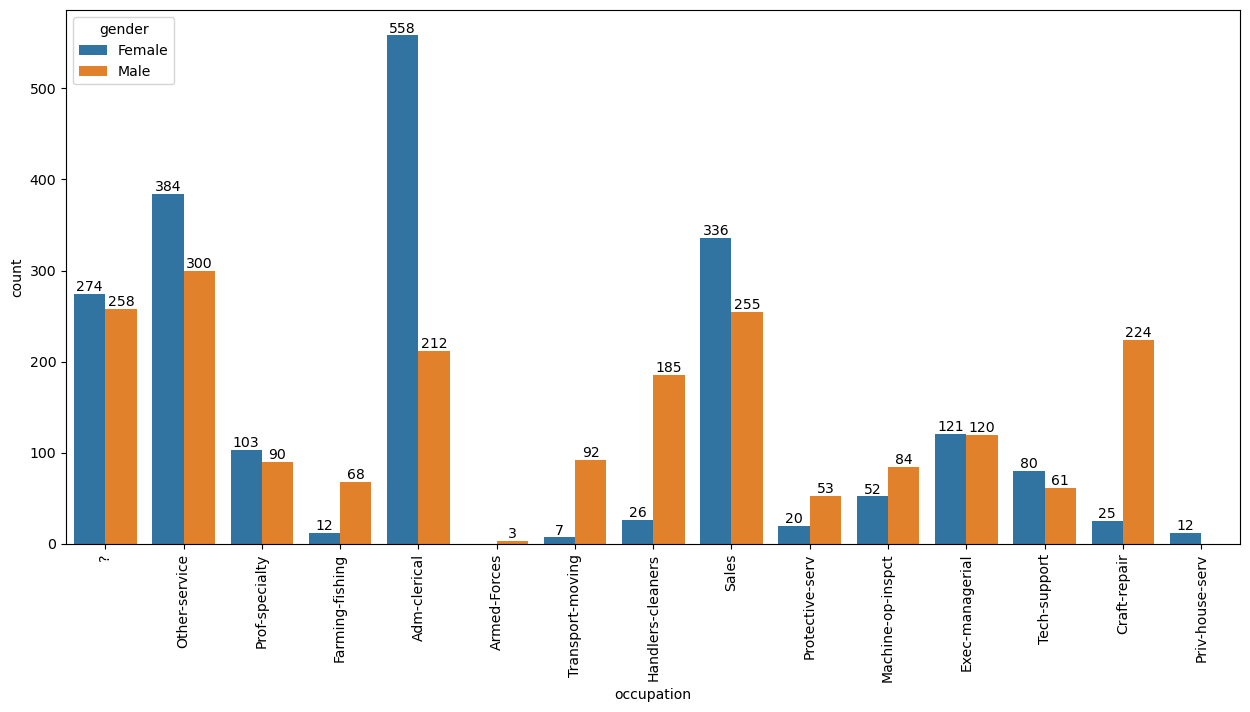

In [40]:
plt.figure(figsize=(15,7),dpi=101)
ax=sns.countplot(data=df[(df['income']=='<=50K')&(df['marital-status']=='Never-married')&
                      (df['native-country']=='United-States')&
                      (df['education']=='Some-college')],x='occupation',hue='gender')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90);

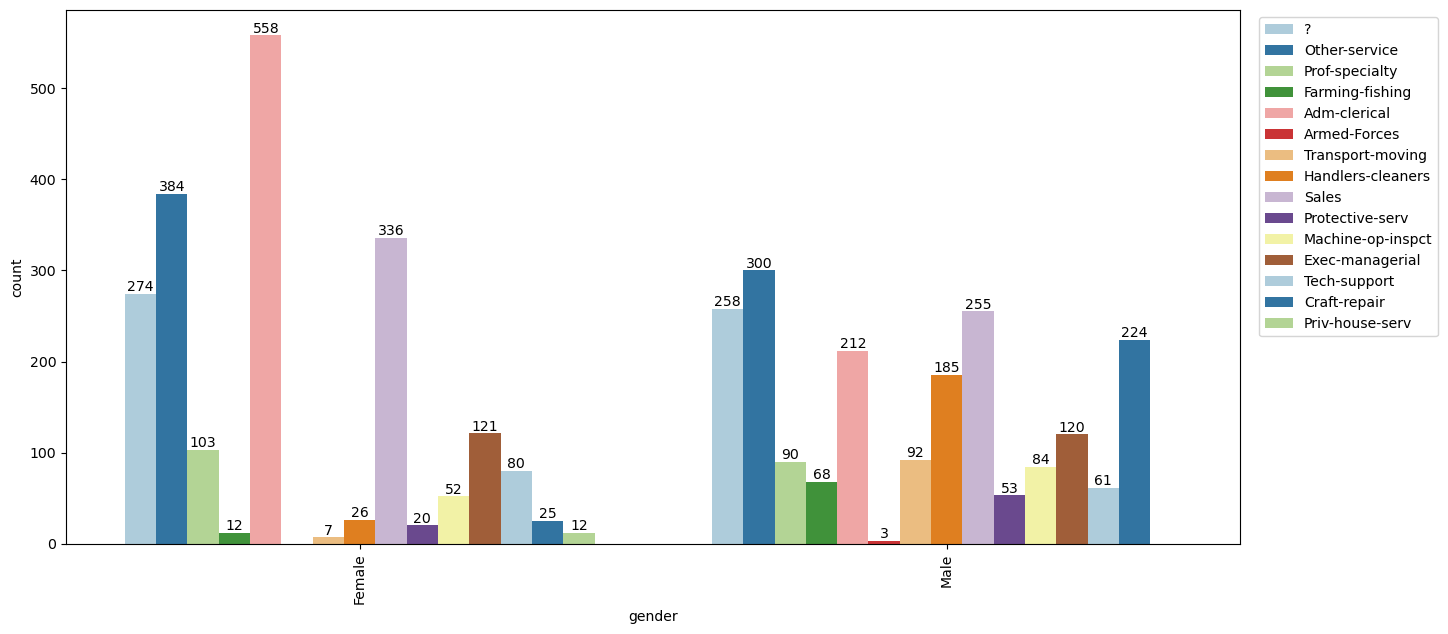

In [41]:
plt.figure(figsize=(15,7),dpi=101)
ax=sns.countplot(data=df[(df['income']=='<=50K')&(df['marital-status']=='Never-married')&
                      (df['native-country']=='United-States')&
                      (df['education']=='Some-college')],x='gender',hue='occupation', palette='Paired')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor=(1.01, 1))

###### Observation:
There are some missing values in 'occupation' feature:
- people with missing occupation are more likely to have,
    1. income lesser than 50k
    2. completed their some-college
    3. are male
    4. are never married
    5. & are from United-States
    
If gender is 'Female' it means occupation is more likely to be 'Adm-clerical', if gender is 'Male' occupation is more likly to be 'Other-service'.

lets replace missing value with respect to above logic
    


In [42]:
df[df['occupation']=='?']['gender'].value_counts()

Male      1536
Female    1273
Name: gender, dtype: int64

In [43]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [44]:
for i in range(len(df)):
    if df['occupation'].iloc[i] == '?':
        if df['gender'].iloc[i] == 'Male':
            df['occupation'].iloc[i] = 'Other-service'
        elif df['gender'].iloc[i] == 'Female':
            df['occupation'].iloc[i] = 'Adm-clerical'
    else:
        continue
            
            

C:\Users\pkana\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
df['occupation'].value_counts()

Adm-clerical         6884
Other-service        6459
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Sales                5504
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

######  Feature - race

In [46]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

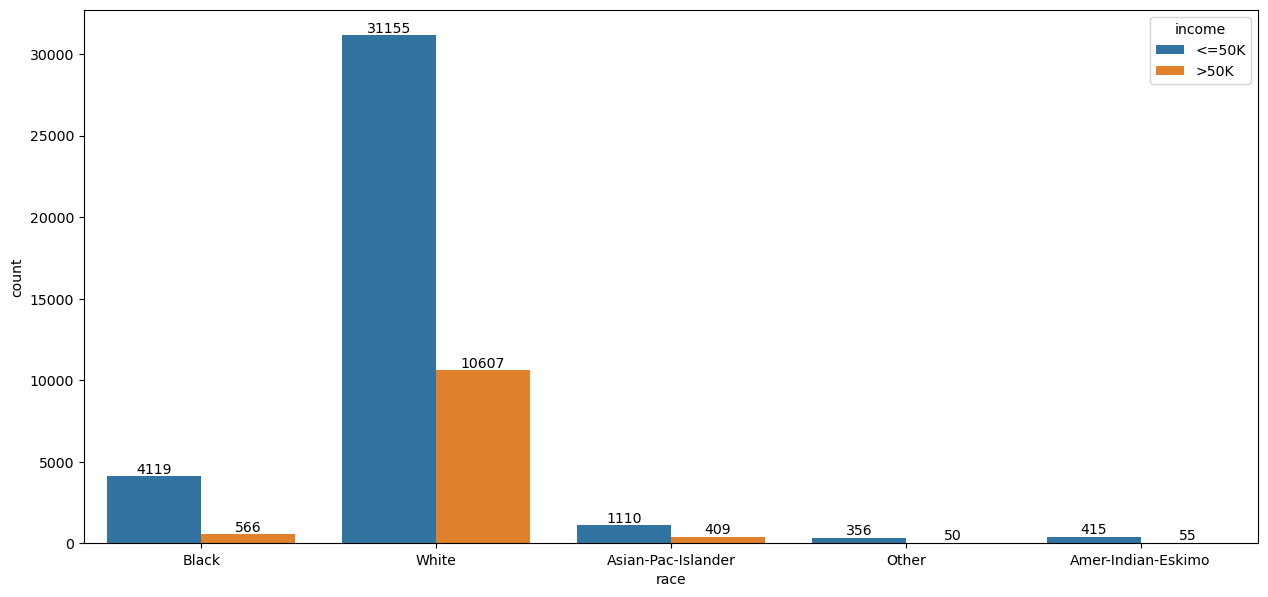

In [47]:
plt.figure(figsize=(15,7),dpi=101)
ax=sns.countplot(data=df,x='race',hue='income')
for i in ax.containers:
    ax.bar_label(i,)

###### Feature - gender

In [48]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

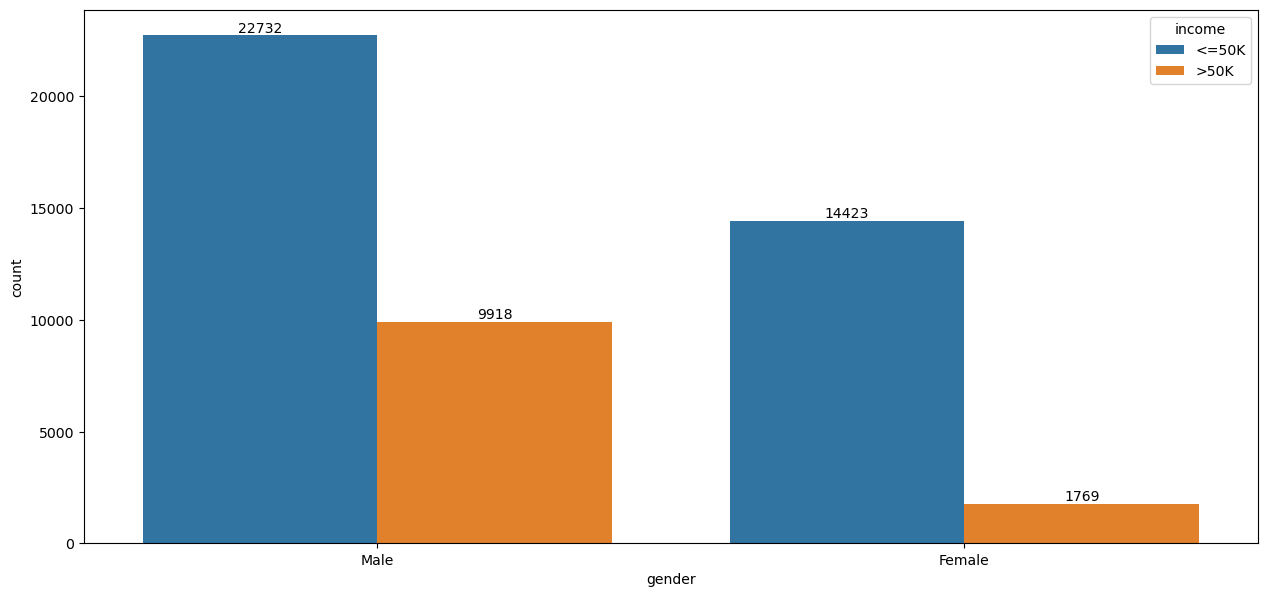

In [49]:
plt.figure(figsize=(15,7),dpi=101)
ax=sns.countplot(data=df,x='gender',hue='income')
for i in ax.containers:
    ax.bar_label(i,)

###### Feature - Native country

In [50]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [51]:
857/(len(df))*100

1.7546374022357807

There 857 (1.76%) missing values in 'native-country' lets check them,


In [52]:
df[df['native-country']=='?']

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K
83,44,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
188,34,State-gov,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?,<=50K
253,42,Federal-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
48750,58,Self-emp-inc,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48773,42,Self-emp-not-inc,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
48791,39,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [53]:
df[df['native-country']=='?']['age'].mean()

38.77246207701283

In [54]:
df[df['native-country']=='?']['age'].median()

37.0

In [55]:
df[df['native-country']=='?']['education'].value_counts()

Bachelors       210
HS-grad         198
Some-college    155
Masters          78
Doctorate        32
Prof-school      26
7th-8th          24
Assoc-voc        23
Assoc-acdm       22
12th             22
5th-6th          19
10th             17
11th             12
9th              11
1st-4th           7
Preschool         1
Name: education, dtype: int64

In [56]:
df[df['native-country']=='?']['race'].value_counts()

White                 573
Black                 132
Asian-Pac-Islander    128
Other                  24
Name: race, dtype: int64

In [57]:
df[df['native-country']=='?']['gender'].value_counts()

Male      609
Female    248
Name: gender, dtype: int64

In [58]:
df[(df['education']=='Bachelors') | (df['education']=='HS-grad') | (df['education']=='Some-college')
  &(df['race']=='White')&(df['gender']=='Male') ]['native-country'].value_counts()

United-States                 27345
?                               473
Mexico                          277
Philippines                     161
Germany                         125
Canada                          110
Puerto-Rico                      96
England                          79
South                            67
Cuba                             64
China                            57
Japan                            53
El-Salvador                      53
Italy                            53
Poland                           53
Jamaica                          49
India                            48
Columbia                         48
Vietnam                          42
Dominican-Republic               35
Iran                             30
Haiti                            30
Peru                             29
Greece                           28
Portugal                         27
Taiwan                           27
Guatemala                        26
Ireland                     

In [59]:
df['native-country'].mode()

0    United-States
dtype: object

In [60]:
# here we can see most of missing values in 'Native-Country' are from United-States, 
#lets replace missing value with 'United -States i.e mode'

df['native-country']=df['native-country'].replace('?',df['native-country'].mode()[0])

In [61]:
df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [64]:
#lets cross check missing values,
feature_details.categorical_feature_details(df_cat)


                   CATEGORICAL FEATURE DETAILS                     


________________

Feature: workclass
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 48842 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 8 unique values

    Unique values are:
     1 - Private
     2 - Local-gov
     3 - Self-emp-not-inc
     4 - Federal-gov
     5 - State-gov
     6 - Self-emp-inc
     7 - Without-pay
     8 - Never-worked

    Unique values counts:
        
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


________________

Feature: education
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 48842 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 16 unique values

    Unique values are:
     1 - 11th
     2 - HS-grad
     3 - Assoc-acdm


In [65]:
#Categorical Data looks clean now,
#lets check numerical data
feature_details.numerical_feature_details(df_num)


                   NUMERICAL FEATURE DETAILS                     


________________

Feature: age
________________

Minimum age is 17
Maximum age is 90
Average age is 38.64


NULLS:-

    0.0 % Null values 
    (i.e Out of 48842 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 74 unique values

OUTLIERS:-

    25th Percentile is:  28.0
    75th Percentile is:  48.0
    Inter Quartile range is:  20.0
    Upper limit is:  78.0
    Lower limit is:  -2.0


    >>> HIGHER OUTLIERS: 216 
    >>> LOWER OUTLIERS: 0 





________________

Feature: educational-num
________________

Minimum educational-num is 1
Maximum educational-num is 16
Average educational-num is 10.08


NULLS:-

    0.0 % Null values 
    (i.e Out of 48842 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 16 unique values

OUTLIERS:-

    25th Percentile is:  9.0
    75th Percentile is:  12.0
    Inter Quartile range is:  3.0
    Upper limit is:  16.5
    Lower limit is:  4.5


    >>> H

In [153]:
df['capital-gain'].describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [154]:
df['capital-gain'].median()

0.0

In [66]:
df['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387], dtype=int64)

In [67]:
df['hours-per-week'].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

<AxesSubplot:xlabel='age'>

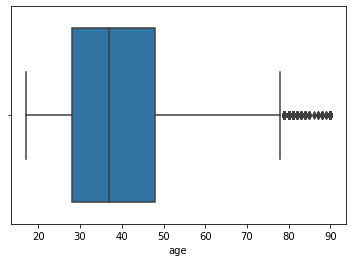

In [68]:
sns.boxplot(data=df,x='age')

<AxesSubplot:xlabel='educational-num'>

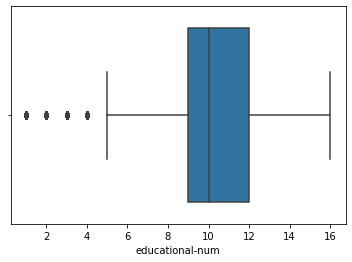

In [69]:
sns.boxplot(data=df,x='educational-num')

<AxesSubplot:xlabel='capital-gain'>

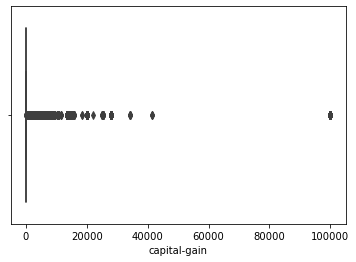

In [70]:
sns.boxplot(data=df,x='capital-gain')

<AxesSubplot:xlabel='capital-loss'>

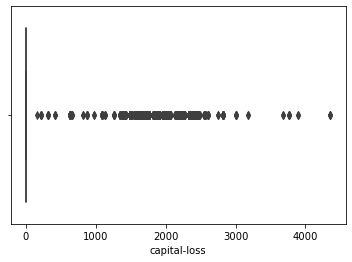

In [71]:
sns.boxplot(data=df,x='capital-loss')

<AxesSubplot:xlabel='hours-per-week'>

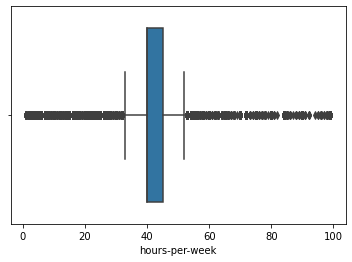

In [72]:
sns.boxplot(data=df,x='hours-per-week')

<AxesSubplot:xlabel='capital-gain', ylabel='hours-per-week'>

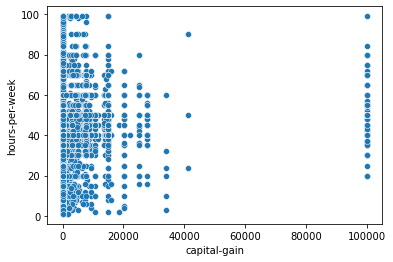

In [73]:
sns.scatterplot(data=df,x='capital-gain',y='hours-per-week')

<AxesSubplot:xlabel='capital-gain', ylabel='age'>

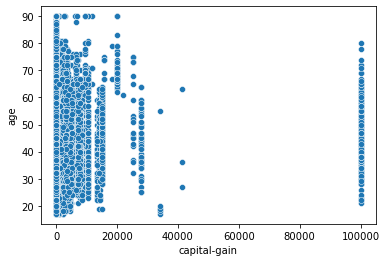

In [74]:
sns.scatterplot(data=df,x='capital-gain',y='age')

In [75]:
df[df['capital-gain']>90000]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,United-States,>50K
346,39,Private,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48109,47,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48371,66,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48519,47,Private,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [76]:
df[df['capital-gain']>90000]['workclass'].value_counts()

Private             131
Self-emp-inc         60
Self-emp-not-inc     40
Local-gov             7
State-gov             4
Federal-gov           2
Name: workclass, dtype: int64

In [176]:
df[(df['workclass']=='Private') & (df['capital-gain']<90000) ]['capital-gain'].max()

41310

In [163]:
df[(df['capital-gain']>40000)&(df['capital-gain']<90000)]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
3605,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,41310,0,90,South,<=50K
22714,27,Private,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,<=50K
36457,63,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,41310,0,50,United-States,<=50K


In [77]:
df[df['capital-gain']>90000]['education'].value_counts()

Prof-school     68
Bachelors       63
HS-grad         34
Masters         30
Doctorate       23
Some-college    18
Assoc-voc        3
10th             2
5th-6th          1
Assoc-acdm       1
9th              1
Name: education, dtype: int64

In [78]:
df[df['capital-gain']>90000]['occupation'].value_counts()

Prof-specialty       101
Exec-managerial       67
Sales                 34
Craft-repair          16
Adm-clerical           9
Other-service          7
Farming-fishing        3
Handlers-cleaners      2
Protective-serv        2
Machine-op-inspct      1
Transport-moving       1
Tech-support           1
Name: occupation, dtype: int64

In [175]:
df[(df['occupation']=='Prof-specialty')&(df['capital-gain']<90000)]['capital-gain'].max()

27828

In [79]:
df[df['capital-gain']>90000]['income'].value_counts()

>50K    244
Name: income, dtype: int64

In [177]:
df[(df['income']=='>50K')&(df['capital-gain']<90000)]['capital-gain'].max()

27828

##### Outliers in Numerical data:

    1. age:
        there can be people with age more than 78 years , data is ok
    
    2. educational-num:
        there can be educational-num with less than 4.5, data is ok

    3. capital-gain:
        as there are entries with 0 capital loss which is also multiplier when calculating outliers, 
        therefore upper limit and lower limits are calculated as 0
          - there are some entries of value '99999',  from above data we can see that most of them 
              a. have done 'Bachelors' and 'Professional Schooling'
              a. have income more than 50k,
              b. are with occupation of 'Prof-specialty'
              Therefore capital-gain of '99999' can be considered valid.

    4. capital-loss:
        as there are entries with 0 capital loss which is also multiplier when calculating outliers, 
        therefore upper limit and lower limits are calculated as 0

    5. hours-per-week:
        as minimum hours-per-week is 1 and maximum hour-per-week are 99, there can be people 
        with hours-per-week less than 40 and higher than 45

###### Lets re-define categorical and numerical dataframe, as we have replaced missing values only in original dataframe.

In [187]:
df_cat=df.select_dtypes(include='object') #categorical dataframe

In [188]:
df_cat=df_cat.drop('income',axis=1) #droping target variable 

In [189]:
df_num=df.select_dtypes(exclude='object') #Numerical dataframe

##### EDA is nearly complete; let's move on to Feature Engineering.

In [190]:
df_cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,United-States


In [191]:
#Lets create dummy variables for categorical features by OneHot encoding:

In [192]:
df_cat_dum=pd.get_dummies(df_cat,drop_first=True)

In [193]:
df_cat_dum.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [194]:
df_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30


In [195]:
#lets concatenate numerical dataframe with categorical dataframe (with dummies):
df_final=pd.concat([df_num,df_cat_dum],axis=1)

In [196]:
df_final.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [197]:
#Lets separate dependant and independant variables

X=df_final #Independant variables
y=df['income'] #Dependant variable (Target)

In [198]:
#lets split training and testing data
from sklearn.model_selection import train_test_split

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [200]:
# Lets standardize data,
from sklearn.preprocessing import StandardScaler

In [201]:
scaler=StandardScaler()

In [202]:
X_train=scaler.fit_transform(X_train)

In [203]:
X_test=scaler.transform(X_test)

In [204]:
#Lets create KNN model
from sklearn.neighbors import KNeighborsClassifier

In [205]:
knn=KNeighborsClassifier()

In [206]:
#Lets frind best K value(i.e n_neighbors) through GridSearch

In [207]:
from sklearn.model_selection import GridSearchCV

In [208]:
param_grid={'n_neighbors':list(range(1,31))}

In [211]:
grid_model=GridSearchCV(knn,param_grid=param_grid,cv=5,scoring='accuracy')

In [212]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [213]:
grid_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 16,
 'p': 2,
 'weights': 'uniform'}

In [214]:
y_pred=grid_model.predict(X_test)

In [215]:
#Lets check results

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score

In [216]:
accuracy_score(y_test,y_pred)

0.8361111111111111

In [217]:
confusion_matrix(y_test,y_pred)

array([[6907,  500],
       [1093, 1220]], dtype=int64)

In [218]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.90      7407
        >50K       0.71      0.53      0.61      2313

    accuracy                           0.84      9720
   macro avg       0.79      0.73      0.75      9720
weighted avg       0.83      0.84      0.83      9720



##### Conclusion: KNN would not be the best option for prediction, despite the accuracy being good. This is because recall and f1-score are subpar.